# Probabilistic model
- Probabilistic retrieval model: estimates how likely it is that a document is relevant to a query
- Odds of an events provide  a multiplier for how probabilities change

```
O(A) = P(A) / [1 - P(A)]
```

- Probabilistic ranking orders documents decreasingly by their estimated probability of relevance to the query

### Probability Ranking Principle (PRP)
- If the retrieved documents (w.r.t. a query) are ranked decreasingly on their probability of relevance, then the effectiveness of the system will be the best that is obtainable

### Binary Indepdence Model (BIM)
- Documents and queries are represented as binary term incidence vectors
- No association between terms (not true, but works in practice – naïve assumption)
- Need to estimate how terms in documents contribute to relevance
- Use statistics to estimate the prob. of relevance `P(R | d, q)`


### Ranking function for query terms
- Boils down to Retrieval Status Value or `RSV` 
- Can rank documents using the log oods ratios for the terms in the query `𝐶𝐶𝑡𝑡`
- Difference between prob. IR and ranked retrieval:  for probabilistic IR, in the end, your score queries not by cosine similarity and tf.idf in a vector space, but by a slightly different formula motivated by probability theory

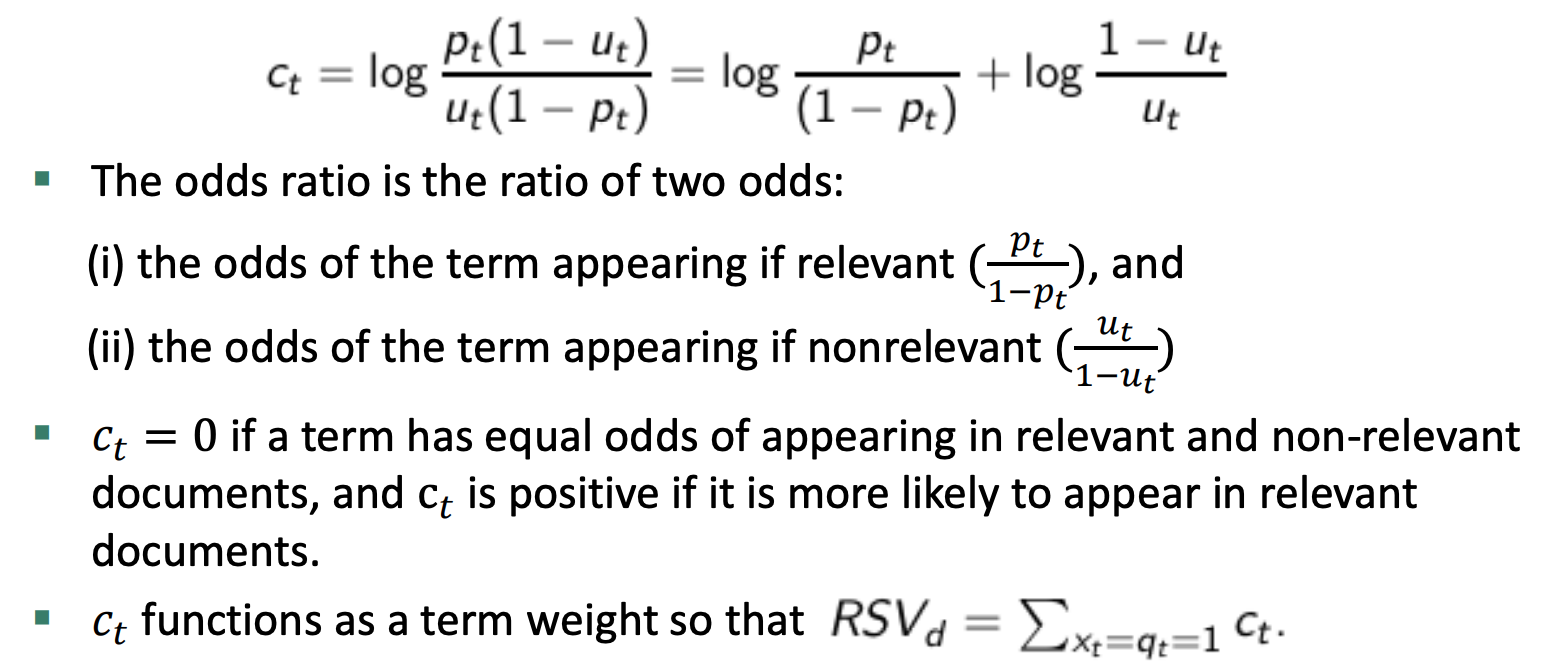


### Okapi BM25: A Nonbinary model
- For modern full-text search collections, a model should pay attention to term frequency and document length

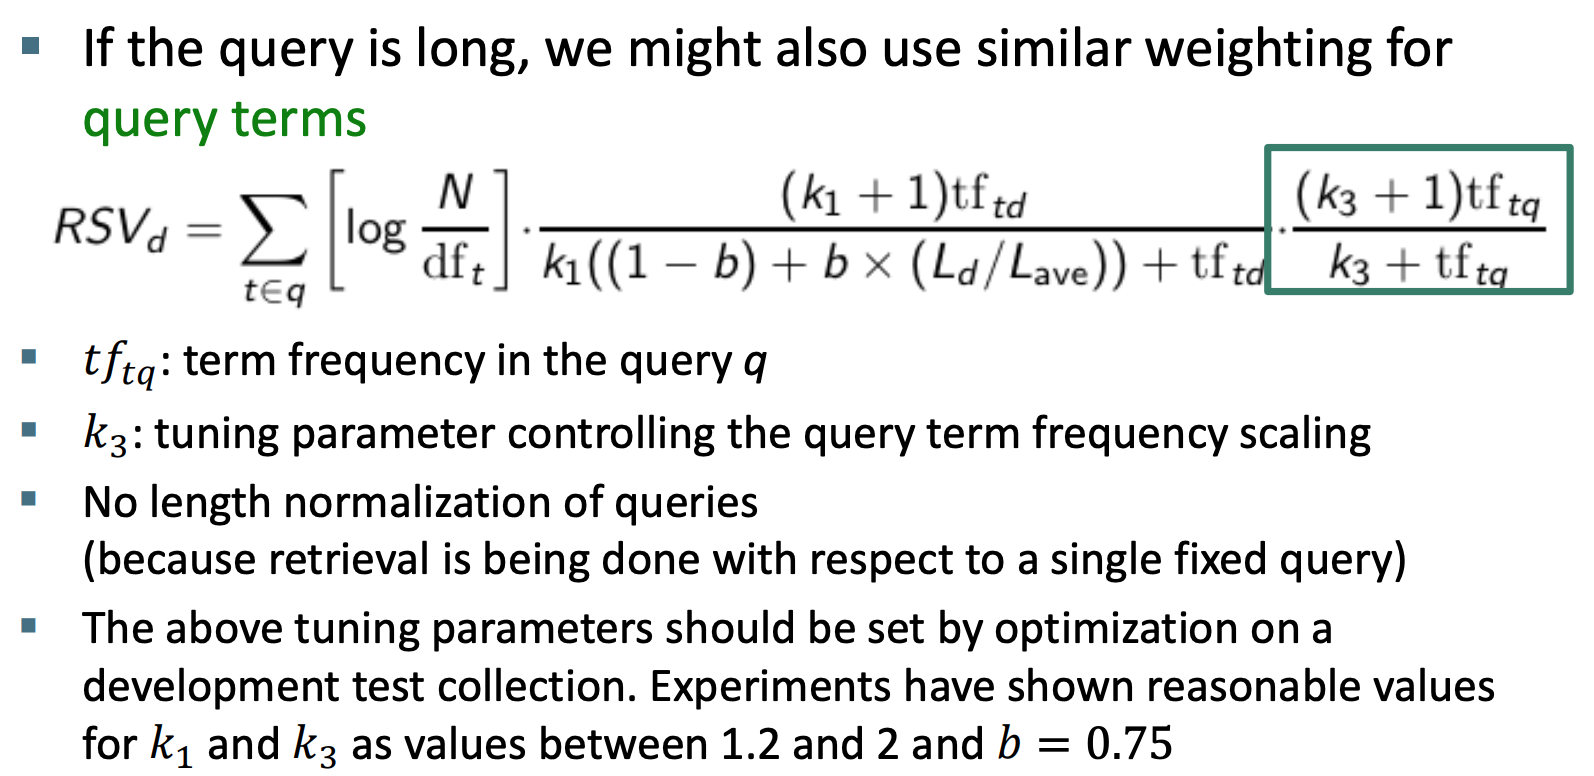


In [2]:
from math import log

k1 = 1.2
k2 = 100
b = 0.75
R = 0.0


def score_BM25(n, f, qf, r, N, dl, avdl):
    K = compute_K(dl, avdl)
    first = log( ( (r + 0.5) / (R - r + 0.5) ) / ( (n - r + 0.5) / (N - n - R + r + 0.5)) )
    second = ((k1 + 1) * f) / (K + f)
    third = ((k2+1) * qf) / (k2 + qf)
    return first * second * third


def compute_K(dl, avdl):
    return k1 * ((1-b) + b * (float(dl)/float(avdl)) )


# Language model
- Want the answer which document is most likely to have generated a said query?
- View the document as a model that generates the query
- We can view a finite state automaton as a deterministic language model. (automatons are probabalistic)

1. Each document is treated as (the basis for) a language model. 
2. Given a query `q`, rank documents based on `P(d | q)`

```
P(d|q) = P(q|d)p(d)/p(q)
```

- p(q) is redundant as it is specific to this query only
- p(d) can be obtained from page ranking
- `P(q|d)` is the probability of `q` given `d`
- To rank documents according to relevance of `q`, ranking according to `P(q|d)` and `P(d|q)` is equivalent

### How to compute `P (q | d)`
- P(q|d) is the probability that a query would be observed as a random sample from the respective document model.

#### Mixture Model
![mixture_model.png](attachment:mixture_model.png)

- Mixes the probability from the document with the general collection frequency of the word.

1. `High value of λ`: "conjuctive-like" search – tends to retrieve documents containing all query words.
2. `Low value of λ`: more disjunctive, suitable for long queries
3. Correctly setting λ is very important for good performance

- The equation represents the probability that the document that the user had in mind was in fact this one. 

### LMs v.s. vector space model
- Language modeling approach always does better in these experiments, but note that where the approach shows `significant gains is at higher levels of recall.`

Similarities:
1. Term frequency is directly used in the model. (but not scaled in the LM)
2. Probabilities are inherently “length-normalized”.
3. Mixing document and collection frequencies has an effect similar to idf. (Terms rare in the general collection but common in the document have a greater influence on the ranking)

Differences:
1. LMs: based on probability theory
2. Vector space: based on similarity, a geometric/ linear algebra notion
3. Collection frequency vs. document frequency
4. Details of term frequency, length normalization etc. 

### Assumptions for Language Models i- n IR
- Simplifying assumption: Queries and documents are objects of same type. `Not true!`
- Simplifying assumption: Terms are conditionally `independent.`